<a href="https://colab.research.google.com/github/jsten07/cms_routing/blob/main/firstCalculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
from skimage.graph import route_through_array
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from datetime import datetime, timedelta
import math

In [ ]:
#create some example values

# create example Grids wit 100*100
N = 100
timeGrid= [[random.random() for i in range(N)] for j in range(N)]
startpoint=(1,10)
endpoint= (90,99)
startTime="15:00"
endTime="18:00"

In [ ]:
#create Route
route, weight = route_through_array(timeGrid, startpoint, endpoint, fully_connected=False, geometric=True)
route

[(1, 10),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (1, 23),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (2, 28),
 (2, 29),
 (3, 29),
 (4, 29),
 (5, 29),
 (6, 29),
 (7, 29),
 (7, 30),
 (8, 30),
 (9, 30),
 (10, 30),
 (11, 30),
 (11, 31),
 (12, 31),
 (12, 32),
 (13, 32),
 (14, 32),
 (14, 33),
 (15, 33),
 (16, 33),
 (17, 33),
 (18, 33),
 (19, 33),
 (20, 33),
 (21, 33),
 (21, 34),
 (22, 34),
 (23, 34),
 (24, 34),
 (24, 35),
 (25, 35),
 (25, 36),
 (25, 37),
 (25, 38),
 (25, 39),
 (25, 40),
 (25, 41),
 (25, 42),
 (25, 43),
 (26, 43),
 (26, 44),
 (26, 45),
 (27, 45),
 (27, 46),
 (28, 46),
 (28, 47),
 (29, 47),
 (29, 48),
 (30, 48),
 (30, 49),
 (31, 49),
 (32, 49),
 (33, 49),
 (34, 49),
 (34, 50),
 (35, 50),
 (35, 51),
 (35, 52),
 (35, 53),
 (36, 53),
 (36, 54),
 (36, 55),
 (36, 56),
 (37, 56),
 (37, 57),
 (38, 57),
 (39, 57),
 (40, 57),
 (41, 57),
 (42, 57),
 (43, 57),
 (44, 57),
 (44, 58

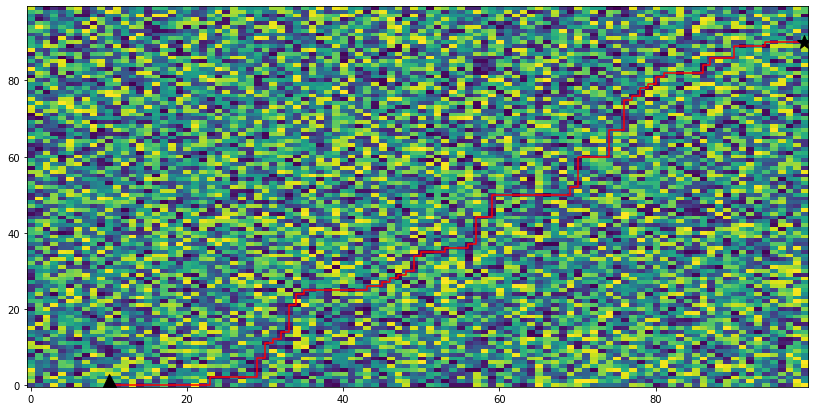

In [ ]:
#plot route
routeDisplay=   np.stack(route, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [ ]:
def makeArrays(route):
    routeNew = []
    for x in route:
      routeNew.append(list(x))
    return routeNew

In [ ]:
route = makeArrays(route)
route

[[1, 10],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [0, 20],
 [0, 21],
 [0, 22],
 [0, 23],
 [1, 23],
 [2, 23],
 [2, 24],
 [2, 25],
 [2, 26],
 [2, 27],
 [2, 28],
 [2, 29],
 [3, 29],
 [4, 29],
 [5, 29],
 [6, 29],
 [7, 29],
 [7, 30],
 [8, 30],
 [9, 30],
 [10, 30],
 [11, 30],
 [11, 31],
 [12, 31],
 [12, 32],
 [13, 32],
 [14, 32],
 [14, 33],
 [15, 33],
 [16, 33],
 [17, 33],
 [18, 33],
 [19, 33],
 [20, 33],
 [21, 33],
 [21, 34],
 [22, 34],
 [23, 34],
 [24, 34],
 [24, 35],
 [25, 35],
 [25, 36],
 [25, 37],
 [25, 38],
 [25, 39],
 [25, 40],
 [25, 41],
 [25, 42],
 [25, 43],
 [26, 43],
 [26, 44],
 [26, 45],
 [27, 45],
 [27, 46],
 [28, 46],
 [28, 47],
 [29, 47],
 [29, 48],
 [30, 48],
 [30, 49],
 [31, 49],
 [32, 49],
 [33, 49],
 [34, 49],
 [34, 50],
 [35, 50],
 [35, 51],
 [35, 52],
 [35, 53],
 [36, 53],
 [36, 54],
 [36, 55],
 [36, 56],
 [37, 56],
 [37, 57],
 [38, 57],
 [39, 57],
 [40, 57],
 [41, 57],
 [42, 57],
 [43, 57],
 [44, 57],
 [44, 58

In [ ]:
def calculateTime(route, startTime, endTime):
    sumTime = 0
    for x in route:
      sumTime = sumTime + timeGrid[x[0]][x[1]]
    startTime_object = datetime.strptime(startTime, "%H:%M" )
    endTime_object = datetime.strptime(endTime, "%H:%M" )
    minutes_added = timedelta(minutes  = sumTime)
    eta = startTime_object + minutes_added
    difference= endTime_object-eta
    total_seconds = difference.total_seconds()
    minutes = total_seconds/60
    return minutes


In [ ]:
difference= calculateTime(route, startTime, endTime)
difference

134.7273381

In [ ]:
def calculateBearing(route):
    for i in range(len(route)-1):
        if route[i][0]< route[i+1][0]:
            route[i].append("up")
        elif route[i][0] > route[i+1][0]:
            route[i].append("down")
        elif route[i][1] < route[i+1][1]:
            route[i].append("right")
        elif route[i][1] > route[i+1][1]:
            route[i].append("left")
        else:
             route[i].append("error")

In [ ]:
calculateBearing(route)


In [ ]:
route

[[1, 10, 'down'],
 [0, 10, 'right'],
 [0, 11, 'right'],
 [0, 12, 'right'],
 [0, 13, 'right'],
 [0, 14, 'right'],
 [0, 15, 'right'],
 [0, 16, 'right'],
 [0, 17, 'right'],
 [0, 18, 'right'],
 [0, 19, 'right'],
 [0, 20, 'right'],
 [0, 21, 'right'],
 [0, 22, 'right'],
 [0, 23, 'up'],
 [1, 23, 'up'],
 [2, 23, 'right'],
 [2, 24, 'right'],
 [2, 25, 'right'],
 [2, 26, 'right'],
 [2, 27, 'right'],
 [2, 28, 'right'],
 [2, 29, 'up'],
 [3, 29, 'up'],
 [4, 29, 'up'],
 [5, 29, 'up'],
 [6, 29, 'up'],
 [7, 29, 'right'],
 [7, 30, 'up'],
 [8, 30, 'up'],
 [9, 30, 'up'],
 [10, 30, 'up'],
 [11, 30, 'right'],
 [11, 31, 'up'],
 [12, 31, 'right'],
 [12, 32, 'up'],
 [13, 32, 'up'],
 [14, 32, 'right'],
 [14, 33, 'up'],
 [15, 33, 'up'],
 [16, 33, 'up'],
 [17, 33, 'up'],
 [18, 33, 'up'],
 [19, 33, 'up'],
 [20, 33, 'up'],
 [21, 33, 'right'],
 [21, 34, 'up'],
 [22, 34, 'up'],
 [23, 34, 'up'],
 [24, 34, 'right'],
 [24, 35, 'up'],
 [25, 35, 'right'],
 [25, 36, 'right'],
 [25, 37, 'right'],
 [25, 38, 'right'],
 [25, 3

In [ ]:
def manipulate(route):
  randomNumber = random.random()*len(route)
  startIndex= math.floor(randomNumber)
  startpoint = route[startIndex]
  endIndex= math.floor(startIndex + (random.random() * (len(route)-startIndex)))
  endpoint= route[endIndex]
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  manipulateRoute, weight = route_through_array(newGrid, startpoint[0:2], endpoint[0:2], fully_connected=False, geometric=True)
  manipulateRoute = makeArrays(manipulateRoute)
  manipulatedRoute = []
  for i in range(startIndex):
            manipulatedRoute.append(route[i])
  for x in manipulateRoute:
    manipulatedRoute.append(x)
  for i in range((endIndex+1),len(route)):
            manipulatedRoute.append(route[i])
  return manipulatedRoute




In [ ]:
manipulatedRoute = manipulate(route)
manipulatedRoute

[[1, 10, 'down'],
 [0, 10, 'right'],
 [0, 11, 'right'],
 [0, 12, 'right'],
 [0, 13, 'right'],
 [0, 14, 'right'],
 [0, 15, 'right'],
 [0, 16, 'right'],
 [0, 17, 'right'],
 [0, 18, 'right'],
 [0, 19, 'right'],
 [0, 20, 'right'],
 [0, 21, 'right'],
 [0, 22, 'right'],
 [0, 23, 'up'],
 [1, 23, 'up'],
 [2, 23, 'right'],
 [2, 24, 'right'],
 [2, 25, 'right'],
 [2, 26, 'right'],
 [2, 27, 'right'],
 [2, 28, 'right'],
 [2, 29, 'up'],
 [3, 29, 'up'],
 [4, 29, 'up'],
 [5, 29, 'up'],
 [6, 29, 'up'],
 [7, 29, 'right'],
 [7, 30, 'up'],
 [8, 30, 'up'],
 [9, 30, 'up'],
 [10, 30, 'up'],
 [11, 30, 'right'],
 [11, 31, 'up'],
 [12, 31, 'right'],
 [12, 32, 'up'],
 [13, 32, 'up'],
 [14, 32, 'right'],
 [14, 33, 'up'],
 [15, 33, 'up'],
 [16, 33, 'up'],
 [17, 33, 'up'],
 [18, 33, 'up'],
 [19, 33, 'up'],
 [20, 33, 'up'],
 [21, 33, 'right'],
 [21, 34, 'up'],
 [22, 34, 'up'],
 [23, 34, 'up'],
 [24, 34, 'right'],
 [24, 35, 'up'],
 [25, 35, 'right'],
 [25, 36, 'right'],
 [25, 37, 'right'],
 [25, 38, 'right'],
 [25, 3

In [ ]:
def removeBearingForDisplay(route):
  newRoute= []
  for x in route:
      newRoute.append(x[0:2])
  return newRoute

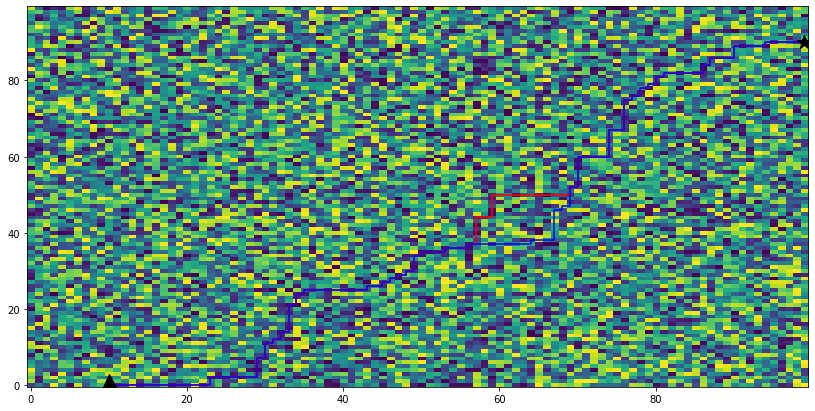

In [ ]:
routeDisplay= removeBearingForDisplay(route)
routeDisplay=  np.stack(routeDisplay, axis=-1)
manipulateRouteDisplay= removeBearingForDisplay(manipulatedRoute)
manipulateRouteDisplay= np.stack(manipulateRouteDisplay, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
plt.plot(manipulateRouteDisplay[1],manipulateRouteDisplay[0], 'b')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [ ]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argmin(dist_2)

In [ ]:
def crossover(route1, route2):
  randomNumber = math.floor(random.random()*len(route))
  crossoverPoint1 = route1[randomNumber]
  index= closest_node(crossoverPoint1, route2)
  crossoverPoint2 = route2[index]
  print(index, crossoverPoint1, crossoverPoint2)
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  crossoverRoute, weight = route_through_array(newGrid, crossoverPoint1[0:2], crossoverPoint2[0:2], fully_connected=False, geometric=True)
  child1= []
  child2= []
  print(route1[0:randomNumber], crossoverRoute, route2[index:len(route2)])
  print(route2[0:index], crossoverRoute, route1[randomNumber:len(route1)])
  for i in range(randomNumber):
    child1.append(route1[i])
  for i in range(index):
    child2.append(route2[i])
  for x in crossoverRoute:
    child1.append(x)
  for i in range(len(crossoverRoute) -1, 0, -1):
    print(i)
    child2.append(crossoverRoute[i])
  for i in range(index +1,len(route2)):
    child1.append(route2[i])
  for i in range(randomNumber,len(route1)):
    child2.append(route1[i])
  return[child1, child2, crossoverRoute]



In [ ]:
newGrid= [[random.random() for i in range(N)] for j in range(N)]
route2, weight = route_through_array(newGrid, startpoint, endpoint, fully_connected=False, geometric=True)


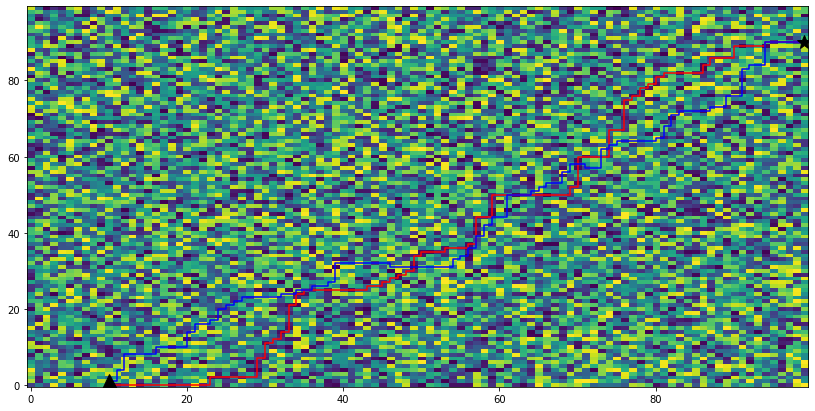

In [ ]:
routeDisplay= removeBearingForDisplay(route)
routeDisplay=  np.stack(routeDisplay, axis=-1)
route2Display= removeBearingForDisplay(route2)
route2Display= np.stack(route2Display, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
plt.plot(route2Display[1],route2Display[0], 'b')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [ ]:
childs=crossover(route, route2)

166 (82, 83) (82, 91)
[(1, 10), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (1, 23), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (3, 29), (4, 29), (5, 29), (6, 29), (7, 29), (7, 30), (8, 30), (9, 30), (10, 30), (11, 30), (11, 31), (12, 31), (12, 32), (13, 32), (14, 32), (14, 33), (15, 33), (16, 33), (17, 33), (18, 33), (19, 33), (20, 33), (21, 33), (21, 34), (22, 34), (23, 34), (24, 34), (24, 35), (25, 35), (25, 36), (25, 37), (25, 38), (25, 39), (25, 40), (25, 41), (25, 42), (25, 43), (26, 43), (26, 44), (26, 45), (27, 45), (27, 46), (28, 46), (28, 47), (29, 47), (29, 48), (30, 48), (30, 49), (31, 49), (32, 49), (33, 49), (34, 49), (34, 50), (35, 50), (35, 51), (35, 52), (35, 53), (36, 53), (36, 54), (36, 55), (36, 56), (37, 56), (37, 57), (38, 57), (39, 57), (40, 57), (41, 57), (42, 57), (43, 57), (44, 57), (44, 58), (44, 59), (45, 59), (46, 59), (47, 59), (48, 59), (49, 59), (50, 59)

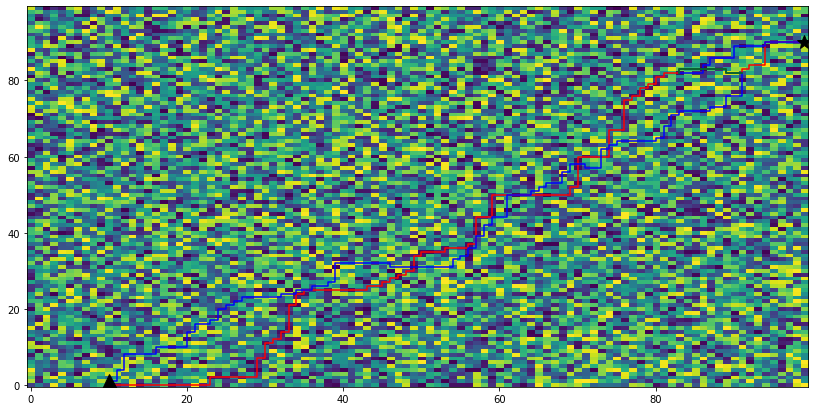

In [ ]:
child1Display= removeBearingForDisplay(childs[0])
child1Display=  np.stack(child1Display, axis=-1)
child2Display= removeBearingForDisplay(childs[1])
child2Display= np.stack(child2Display, axis=-1)

crossoverDisplay= np.stack(childs[2], axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(child1Display[1],child1Display[0], 'r')
plt.plot(child2Display[1],child2Display[0], 'b')
plt.plot(crossoverDisplay[1],crossoverDisplay[0], 'g')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [ ]:
def findDuplicate(node, nodes, index):
    nodes= nodes[index: len(nodes)]
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.where(dist_2 == 0)

In [ ]:
def eleminateDuplicates(route):
    for i in range(0, len(route)):
      duplicate=findDuplicate(route[i],route, i)
      duplicate=duplicate[0]
      if len(duplicate) > 1:
        print(duplicate[0], duplicate[1])
        newArray= route[:i] + route[i+duplicate[1]:]
        return newArray
    return route


In [ ]:
child1= eleminateDuplicates(childs[0])
child2= eleminateDuplicates(childs[1])

0 8


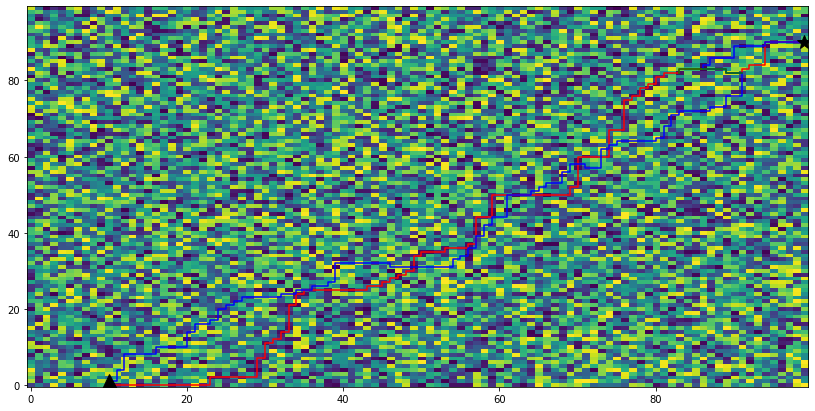

In [ ]:
child1Display= removeBearingForDisplay(child1)
child1Display=  np.stack(child1Display, axis=-1)
child2Display= removeBearingForDisplay(child2)
child2Display= np.stack(child2Display, axis=-1)

crossoverDisplay= np.stack(childs[2], axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(child1Display[1],child1Display[0], 'r')
plt.plot(child2Display[1],child2Display[0], 'b')
plt.plot(crossoverDisplay[1],crossoverDisplay[0], 'g')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [ ]:
findDuplicate([1,10], childs[1], 0)

(array([0]),)